<a href="https://colab.research.google.com/github/yasamankfd/2-functions-With-Thread/blob/master/cifar10_cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
782/782 [==============================] - 7s 6ms/step - loss: 1.7131 - accuracy: 0.3623 - val_loss: 1.3806 - val_accuracy: 0.4916
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 1.3241 - accuracy: 0.5236 - val_loss: 1.1563 - val_accuracy: 0.5859
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 1.1580 - accuracy: 0.5920 - val_loss: 1.1170 - val_accuracy: 0.6018
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0428 - accuracy: 0.6341 - val_loss: 0.9812 - val_accuracy: 0.6514
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9452 - accuracy: 0.6690 - val_loss: 0.9189 - val_accuracy: 0.6703
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8824 - accuracy: 0.6912 - val_loss: 0.8904 - val_accuracy: 0.6890
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8142 - accuracy: 0.7167 - val_loss: 0.8363 - val_accuracy: 0.7083
Epoch 

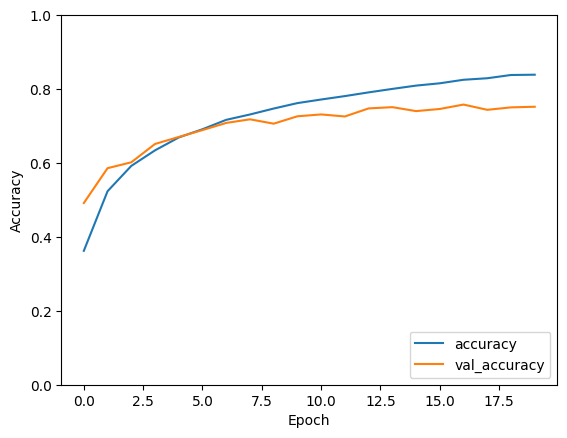

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
